In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dr = 'training_set/training_set'
validation_dr = 'validation_set/validation_set'
test_dr = 'test_set/test_set/'

cat_train_path = 'training_set/training_set/cats'
dog_train_path = 'training_set/training_set/dogs'
cat_val_path = 'validation_set/validation_set/cats'
dog_val_path = 'validation_set/validation_set/dogs'


In [32]:
print(len(os.listdir(cat_train_path)))
print(len(os.listdir(cat_val_path)))
print(len(os.listdir(dog_train_path)))
print(len(os.listdir(dog_val_path)))

1280
1921
1281
1923


In [33]:
con_base = VGG16(weights='imagenet',
                include_top = False,
                input_shape=(512,512,3))

In [34]:
con_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 512, 512, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 512, 512, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 256, 256, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 256, 256, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 128, 128, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 64, 64, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

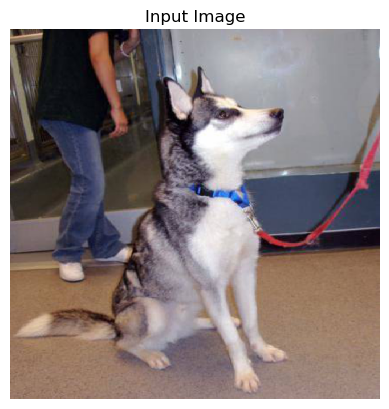

1/1 ━━━━━━━━━━━━━━━━━━━━ 90s 90s/step


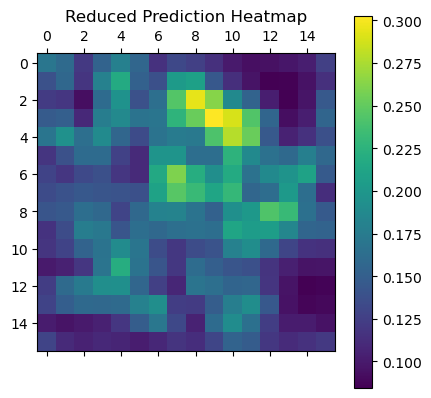

In [36]:
testImg = load_img("test_set/test_set/dogs/dog.4001.jpg" , target_size = (512,512))

testImg = img_to_array(testImg)
testImg = np.expand_dims(testImg , axis=0)
testImg/=255.0

plt.imshow(testImg[0])
plt.title("Input Image")
plt.axis("off")
plt.show()

prediction = con_base.predict(testImg)

reduced_prediction = np.mean(prediction[0], axis=-1)
plt.matshow(reduced_prediction,cmap='viridis')
plt.title("Reduced Prediction Heatmap")
plt.colorbar()
plt.show()


In [37]:
model = models.Sequential()
model.add(con_base)
model.add(layers.Flatten())
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dense(1 , activation='sigmoid'))

In [38]:
print(len(model.trainable_weights))

30


In [39]:
con_base.trainable=False

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1/255.
)

train_generator = train_datagen.flow_from_directory(
    train_dr,
    target_size=(512, 512),  # Updated size to match VGG16 input
    batch_size=64,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dr,
    target_size=(512, 512),  # Updated size to match VGG16 input
    batch_size=64,
    class_mode='binary'
)


Found 2561 images belonging to 2 classes.
Found 3842 images belonging to 2 classes.


In [44]:
from keras import optimizers
from keras import callbacks

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    metrics=['acc']
)

callback = callbacks.EarlyStopping(monitor='val_acc', patience=2)

history = model.fit(
    train_generator,
    steps_per_epoch=40,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[callback]
)


Epoch 1/50
13/40 ━━━━━━━━━━━━━━━━━━━━ 10:58 24s/step - acc: 0.5384 - loss: 23.1432

KeyboardInterrupt: 